## Lab 4 - MNIST

For lab 4, you will complete and submit this ipynb to Canvas by the deadline.

Please see the posted Fashion-MNIST Jupyter Notebook. You should use it as the guideline to complete this Jupyter Notebook. There are many similarities, except a few places that you need to make modifications.

Read the lab description carefully for the instructions. 


In [1]:
# All the needed imports
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

In [2]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data", #root directory
    train=True, #specify as training data
    download=True, #download dataset from the internet
    transform=ToTensor(), #tronsform to tensors
) #load training data

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data", #root directory
    train=False, #specify as test data
    download=True, #download dataset from the internet
    transform=ToTensor(), #transfrom to tensors
) #load test data

In [3]:
# Create data loaders.
batch_size = 64 #specify batch_size

train_dataloader = DataLoader(training_data, batch_size=batch_size) #create dataloader from training dataset
test_dataloader = DataLoader(test_data, batch_size=batch_size) #create dataloader from testing dataset

for X, y in test_dataloader: #print the layout of data in dataloader
    print("Shape of X [N, C, H, W]: ", X.shape) #X:input -> N:batch_size, C:item per data point, H:height, W:width
    print("Shape of y: ", y.shape, y.dtype) #Y:labels
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


In [4]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu" #let device be cuda, and cpu if not availale
print("Using {} device".format(device)) #print the running device

# Define an NN model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__() #construct neural network structure
        self.flatten = nn.Flatten() #assign a function that converts 2D image of 28*28 dimension to 1D array of 784 pixel values
        self.linear_relu_stack = nn.Sequential( #assign function to process data with network layers
            nn.Linear(28*28, 512), #apply linear transformation using its stored biases to dataset from (original) 28*28 -> 512 [layer1]
            nn.ReLU(), #apply non-linear activations to introduce nonlinearity, help the network learn with wider variety
            nn.Linear(512, 512), #apply linear transformation using its stored biases from layer1's output 512->512 [layer2]
            nn.ReLU(), #apply non-linear activations to introduce nonlinearity, help the network learn with wider variety
            nn.Linear(512, 10) #apply linear transformation using its stored biases from layer2's output to final output 512 _> 10 (final) [layer3]
        )

    def forward(self, x): #execute operations on input data
        x = self.flatten(x) #call previously defined functions: flatten 2D image to 1D array
        logits = self.linear_relu_stack(x) #process 1D array with the assigned process (network layers)
        return logits #return data

model = NeuralNetwork().to(device) #assign nn to specified device
print(model) #display model dimensions

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [5]:
# Set the loss and optimizer to be used in the next next cell
loss_fn = nn.CrossEntropyLoss() #function to calculate degree of inaccuracy
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3) #function that reduces error in each training step, algorithm used is SGD (Stochastic Gradient Descent)
#1st arg: model parameters
#2nd arg:: learning rate

In [6]:
# Define the train and test functions
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset) #size of training dataset
    model.train() #train model
    for batch, (X, y) in enumerate(dataloader): #enumerating through data batches
        X, y = X.to(device), y.to(device) #for  each batch, load image and label into model

        # Compute prediction error
        pred = model(X) #get predictions
        loss = loss_fn(pred, y) #compare to expected output and calculate loss

        # Backpropagation
        optimizer.zero_grad() #reset gradients of model parameters
        loss.backward() #backpropagate the obtained loss
        optimizer.step() #adjust the model parameters by using the gradient collected in the model in the backpropagation

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X) 
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]") #print loss in current batch, and current batch

def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset) #get size of dataset
    num_batches = len(dataloader) #get number of batches in testing dataset
    model.eval() #evaluate model
    test_loss, correct = 0, 0 #initialize loss and correct predictions
    with torch.no_grad(): #stops model from changing parameters
        for X, y in dataloader: #iterate through dataset
            X, y = X.to(device), y.to(device) #feed data input, label to model
            pred = model(X) #get model's predictions
            test_loss += loss_fn(pred, y).item() #adding to total loss in test
            correct += (pred.argmax(1) == y).type(torch.float).sum().item() #add to total correct count
    test_loss /= num_batches #get the average loss
    correct /= size #get the accuracy
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n") #print result


In [ ]:
# Training the NN model 
epochs = 20 #specify number of epochs (iteration over dataset)
for t in range(epochs): #loop the specified epochs
    print(f"Epoch {t+1}\n-------------------------------") #print iteration number
    train(train_dataloader, model, loss_fn, optimizer) #train the model
    test(test_dataloader, model, loss_fn) #test the model accuracy on each epoch
print("Done!") #report after done training


Epoch 1
-------------------------------
loss: 2.307163  [    0/60000]
loss: 2.299387  [ 6400/60000]
loss: 2.303373  [12800/60000]
loss: 2.290516  [19200/60000]
loss: 2.295347  [25600/60000]
loss: 2.286076  [32000/60000]
loss: 2.266953  [38400/60000]
loss: 2.280548  [44800/60000]
loss: 2.270001  [51200/60000]
loss: 2.254120  [57600/60000]
Test Error: 
 Accuracy: 27.7%, Avg loss: 2.259224 

Epoch 2
-------------------------------
loss: 2.258694  [    0/60000]
loss: 2.250324  [ 6400/60000]
loss: 2.260279  [12800/60000]
loss: 2.230336  [19200/60000]
loss: 2.242812  [25600/60000]
loss: 2.235419  [32000/60000]
loss: 2.206584  [38400/60000]
loss: 2.232621  [44800/60000]
loss: 2.208228  [51200/60000]
loss: 2.189519  [57600/60000]
Test Error: 
 Accuracy: 52.9%, Avg loss: 2.192913 

Epoch 3
-------------------------------
loss: 2.192996  [    0/60000]
loss: 2.179470  [ 6400/60000]
loss: 2.197941  [12800/60000]
loss: 2.143229  [19200/60000]
loss: 2.162090  [25600/60000]
loss: 2.153341  [32000/600

In [8]:
# Saving the model in a file, we will use it in the next cell
torch.save(model.state_dict(), "model.pth") #save model to model.pth
print("Saved PyTorch Model State to model.pth") #report

Saved PyTorch Model State to model.pth


In [9]:
# Using the model for some testing
model = NeuralNetwork() #initialize empty model
model.load_state_dict(torch.load("model.pth")) #load trained model into model

classes = [
    "0",
    "1",
    "2",
    "3",
    "4",
    "5",
    "6",
    "7",
    "8",
    "9",
] #classes according to label

model.eval() #evaluate model 
x1, y1 = test_data[1][0], test_data[1][1] #get first input of testing dataset in x1, get label in y1
with torch.no_grad(): #disable parameter change
    pred = model(x1) #get prediction from model
    predicted, actual = classes[pred[0].argmax(0)], classes[y1] #get predicted value, and expected value
    print(f'Predicted: "{predicted}", Actual: "{actual}"') #report
# Test for at least three test cases

#repeat for two more test cases
x2, y2 = test_data[24][0], test_data[24][1]
with torch.no_grad():
    pred = model(x2)
    predicted, actual = classes[pred[0].argmax(0)], classes[y2]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')
    
x3, y3 = test_data[47][0], test_data[47][1]
with torch.no_grad():
    pred = model(x3)
    predicted, actual = classes[pred[0].argmax(0)], classes[y3]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "2", Actual: "2"
Predicted: "9", Actual: "4"
Predicted: "2", Actual: "2"


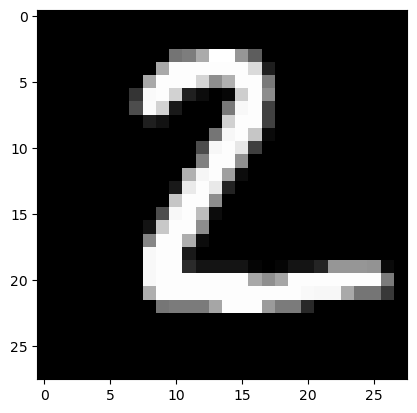

In [10]:
# Plot the test images used in the previous cell
#plot image from dataset
plt.imshow(test_data[1][0].squeeze(), cmap = "gray")



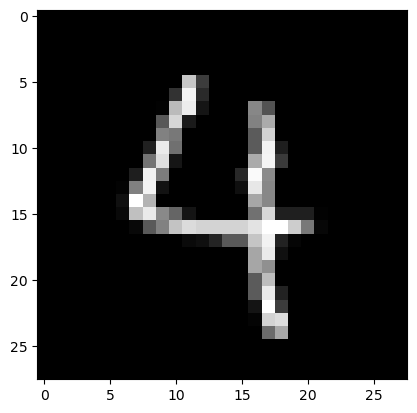

In [11]:
# Include more testing and visualization here
plt.imshow(test_data[24][0].squeeze(), cmap = "gray")


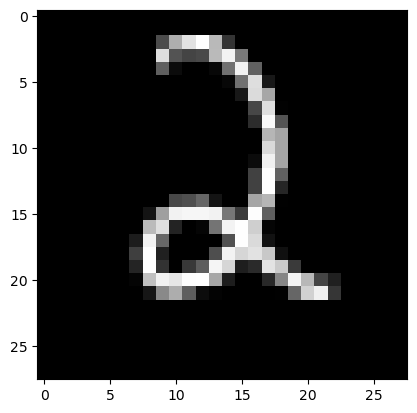

In [12]:
plt.imshow(test_data[47][0].squeeze(), cmap = "gray")